**13.** Hierarchical binomial model: Exercise 3.8 described a survey of bicycle traffic in Berkeley,
California, with data displayed in Table 3.3. For this problem, restrict your attention to
the first two rows of the table: residential streets labeled as ‘bike routes,’ which we will
use to illustrate this computational exercise.

**(a)** Set up a model for the data in Table 3.3 so that, for $j = 1, . . . , 10$, the observed number
of bicycles at location $j$ is binomial with unknown probability $θ_j$ and sample size equal
to the total number of vehicles (bicycles included) in that block. The parameter $θ_j$
can be interpreted as the underlying or ‘true’ proportion of traffic at location $j$ that is
bicycles. (See Exercise 3.8.) Assign a beta population distribution for the parameters
$θ_j$ and a noninformative hyperprior distribution as in the rat tumor example of Section
5.3. Write down the joint posterior distribution.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as sp
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore")

In [2]:
y1 = np.array([16,9,10,13,19,20,18,17,35,55])
n1 = np.array([58,90,48,57,103,57,86,112,273,64])
J = len(n1)

In [3]:
# (equation (5.8) in the book) 

def lp_marg(alpha, beta):
    lp = -2.5*np.log(alpha + beta)
    lp += J*(sp.loggamma(alpha + beta) - sp.loggamma(alpha) - sp.loggamma(beta))
    for j in range(J):
        lp += sp.loggamma(alpha + y1[j]) + sp.loggamma(beta + n1[j] - y1[j]) - sp.loggamma(alpha + beta + n1[j])
    return lp

**(b)** Compute the marginal posterior density of the hyperparameters and draw simulations
from the joint posterior distribution of the parameters and hyperparameters, as in
Section 5.3.

In [4]:
n = 100
alpha_ = np.linspace(0.1, 2.5, n)
beta_ = np.linspace(0.1, 6, n)
alpha, beta = np.meshgrid(alpha_, beta_, sparse=True)
alpha_ns, beta_ns = np.meshgrid(alpha_, beta_, sparse=False)
lp = lp_marg(alpha, beta)
lp = np.exp(lp-np.max(lp))
#Normalize to probability distribution
Dalpha = np.diff(np.linspace(0.1, 2.5, n)[:2])
Dbeta = np.diff(np.linspace(0.1, 6, n)[:2])
p = lp/(Dalpha*Dbeta*np.sum(lp))

In [5]:
p_flatten = np.ravel(p)
S = 100
ind = random.choices(np.arange(len(p_flatten)), k = S, weights = p_flatten)
alpha_sim = np.ravel(alpha_ns)[ind]
beta_sim = np.ravel(beta_ns)[ind]

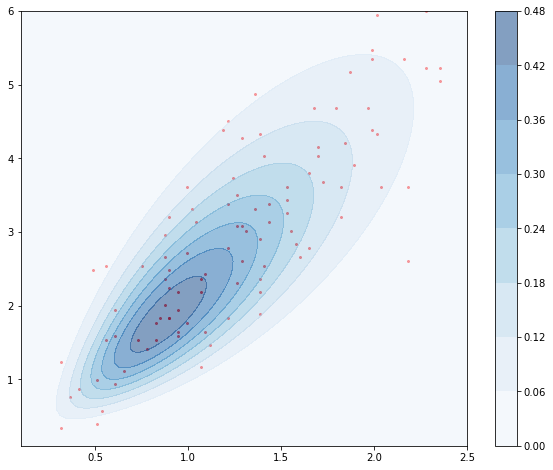

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(alpha_sim, beta_sim, c = 'red', s = 4, alpha = 0.7)
plt.contourf(alpha_, beta_, p, levels = 8, alpha = 0.5, cmap = plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.show()

**(c)** Compare the posterior distributions of the parameters $θ_j$ to the raw proportions,
(number of bicycles / total number of vehicles) in location $j$. How do the inferences
from the posterior distribution differ from the raw proportions?

In [7]:
theta_sim = np.zeros((J, S))
for j in range(J):
    theta_sim[j, :] = st.beta.rvs(alpha_sim+y1[j], beta_sim+n1[j]-y1[j])

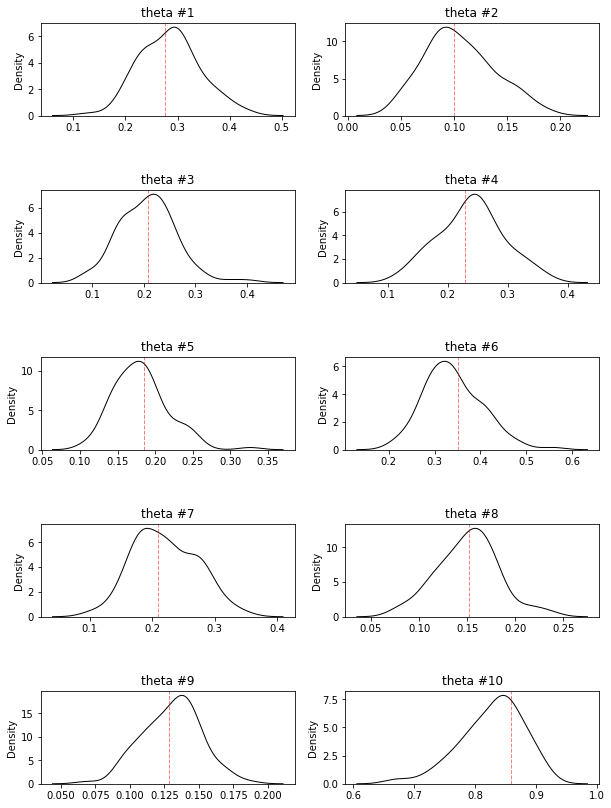

In [8]:
figure, axis = plt.subplots(5, 2, figsize = (10, 14))
for m, j in zip(product(range(5), range(2)), range(J)):
    sns.distplot(theta_sim[j,:], hist = False, color = 'black', kde = True, kde_kws = {'linewidth': 1}, ax = axis[m[0], m[1]])
    axis[m[0], m[1]].axvline(y1[j] / n1[j], color = 'red', ls = '--', lw = 1, alpha = 0.5)
    axis[m[0], m[1]].set_title("theta #{}".format(j+1))
figure.subplots_adjust(hspace = 0.8, wspace = 0.2)
plt.show()

**(d)** Give a 95% posterior interval for the average underlying proportion of traffic that is
bicycles.

In [9]:
np.quantile(np.mean(theta_sim, axis = 0), [0.025, 0.975])

array([0.23895272, 0.29889054])

**(e)** A new city block is sampled at random and is a residential street with a bike route. In
an hour of observation, 100 vehicles of all kinds go by. Give a 95% posterior interval
for the number of those vehicles that are bicycles. Discuss how much you trust this
interval in application.

In [10]:
block = np.random.choice(np.arange(10), S)
theta_pred_sim = np.zeros(S)
for j in range(J):
    nj = np.sum(block == j)
    theta_pred_sim[block == j] = np.random.choice(theta_sim[j, :], nj)
y_pred = st.binom.rvs(100, theta_pred_sim, size = S)
np.quantile(y_pred, [0.025, 0.975])

array([ 7., 87.])

**(f)** Was the beta distribution for the $θ_j\,'s$ reasonable?

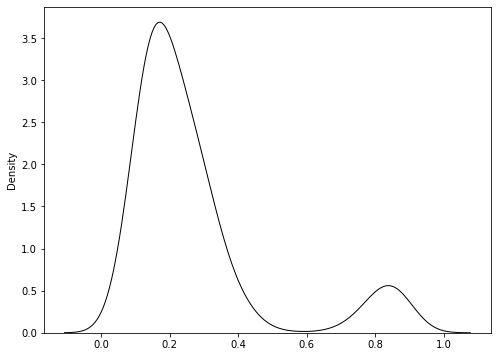

In [11]:
plt.figure(figsize = (8,6))
sns.distplot(theta_sim, hist = False, color = 'black', kde=True,kde_kws = {'linewidth': 1});